In [3]:
!pip install statsmodels


^C


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [3]:
epa_data = pd.read_csv("c4_epa_air_quality.csv", index_col = 0)
epa_data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.994737,14
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.200000,2
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,0.200000,2
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,0.400000,5
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,0.300000,6


In [4]:
epa_data.describe(include='all')

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
count,260,260,260,260,257,260,260,260.000000,260.000000
unique,1,52,149,190,253,1,1,NaN,NaN
top,2018-01-01,California,Los Angeles,Not in a city,Kapolei,Carbon monoxide,Parts per million,NaN,NaN
freq,260,66,14,21,2,260,260,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.403169,6.757692
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.317902,7.061707
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276315,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.516009,9.000000


In [17]:
population_mean = epa_data['aqi'].mean()
population_mean

np.float64(6.757692307692308)

In [18]:
print("For a more thorough examination of observations by state use values_counts()")
print(epa_data['state_name'].value_counts())

For a more thorough examination of observations by state use values_counts()
state_name
California              66
Arizona                 14
Ohio                    12
Florida                 12
Texas                   10
Pennsylvania            10
New York                10
Colorado                 9
Michigan                 9
Minnesota                7
New Jersey               6
Indiana                  5
Nevada                   4
Maryland                 4
Massachusetts            4
Oklahoma                 4
North Carolina           4
Virginia                 4
Connecticut              4
Wyoming                  3
Utah                     3
Hawaii                   3
Illinois                 3
Missouri                 3
Iowa                     3
Kentucky                 3
Vermont                  3
Rhode Island             2
Alaska                   2
Georgia                  2
Washington               2
Idaho                    2
Nebraska                 2
Montana              

**Summarize the mean AQI for RRE states**

In [30]:
# Create a list of RRE states.

rre_states = ['California','Florida','Michigan','Ohio','Pennsylvania','Texas']

# Subset `aqi` to only consider these states.

aqi_rre = epa_data[epa_data['state_name'].isin(rre_states)]

# Find the mean aqi for each of the RRE states.

aqi_rre.groupby(['state_name']).agg({"aqi":"mean","state_name":"count"}) #alias as aqi_rre

,aqi,state_name
state_name,,
California,12.121212,66
Florida,5.500000,12
Michigan,8.111111,9
Ohio,3.333333,12
Pennsylvania,2.900000,10
Texas,2.700000,10


<Axes: xlabel='state_name', ylabel='aqi'>

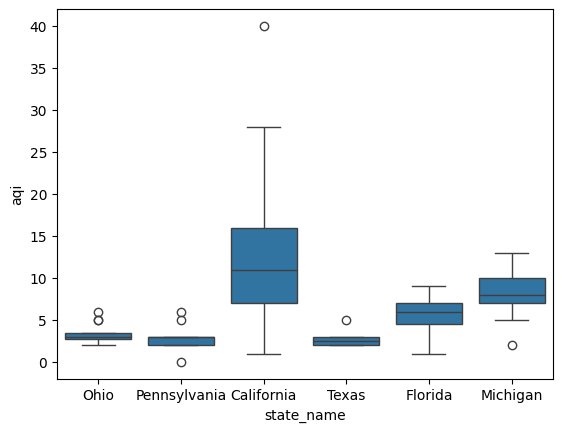

In [31]:
import seaborn as sns
sns.boxplot(x=aqi_rre["state_name"],y=aqi_rre["aqi"])

which state(s) will be most affected by this policy?

California: The mean and a signficant portion of the boxplot range over 10.
Michigan: While the mean is below 10, the boxplot ranges above 10.

### Construct a confidence interval for the RRE state with the highest mean AQI

1. Identify a sample statistic.
2. Choose a confidence level.
3. Find the margin of error.
4. Calculate the interval.

In [32]:
aqi_ca = epa_data[epa_data['state_name']=='California']

sample_mean = aqi_ca['aqi'].mean()
sample_mean

np.float64(12.121212121212121)

In [38]:
confidence_level = 0.95
confidence_level

0.95

with the well known rule the z_value is  1.96  for 95% conf. level

In [34]:
z_value = 1.96

# Next, calculate your standard error.

standard_error = aqi_ca['aqi'].std() / np.sqrt(aqi_ca.shape[0])
print("standard error:")
print(standard_error)

# Lastly, use the preceding result to calculate your margin of error.

margin_of_error = standard_error * z_value
print("margin of error:")
print(margin_of_error)

standard error:
0.8987209641127412
margin of error:
1.7614930896609726


In [35]:
# Calculate your confidence interval (upper and lower limits).

upper_ci_limit = sample_mean + margin_of_error
lower_ci_limit = sample_mean - margin_of_error
(lower_ci_limit, upper_ci_limit)

(np.float64(10.359719031551148), np.float64(13.882705210873095))

In [44]:

float(standard_error)


0.8987209641127412

In [47]:
#Alternative: Construct the interval using scipy.stats.norm.interval()

from scipy import stats


In [51]:
stats.norm.interval(float(confidence_level), loc=float(sample_mean), scale=float(standard_error))

(np.float64(10.359751399400034), np.float64(13.882672843024208))

**Statistical tests on "Samples with replacement"**

In [7]:
sampled_data = epa_data.sample(n=50, replace=True, random_state=42)
sampled_data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
102,2018-01-01,Texas,Harris,Houston,Clinton,Carbon monoxide,Parts per million,0.157895,2
106,2018-01-01,California,Imperial,Calexico,Calexico-Ethel Street,Carbon monoxide,Parts per million,1.183333,26
71,2018-01-01,Alabama,Jefferson,Birmingham,Arkadelphia/Near Road,Carbon monoxide,Parts per million,0.200000,2
188,2018-01-01,Arizona,Maricopa,Tempe,Diablo,Carbon monoxide,Parts per million,0.542105,10
20,2018-01-01,Virginia,Roanoke,Vinton,East Vinton Elementary School,Carbon monoxide,Parts per million,0.100000,1
102,2018-01-01,Texas,Harris,Houston,Clinton,Carbon monoxide,Parts per million,0.157895,2
121,2018-01-01,North Carolina,Mecklenburg,Charlotte,Garinger High School,Carbon monoxide,Parts per million,0.200000,2
214,2018-01-01,Florida,Broward,Davie,Daniela Banu NCORE,Carbon monoxide,Parts per million,0.273684,5
87,2018-01-01,California,Humboldt,Eureka,Jacobs,Carbon monoxide,Parts per million,0.393750,5
99,2018-01-01,California,Santa Barbara,Goleta,Goleta,Carbon monoxide,Parts per million,0.222222,3


In [8]:
sample_mean = sampled_data['aqi'].mean()
sample_mean

np.float64(5.54)

** sample_mean different from population_mean?**

**Apply the central limit theorem**

In [10]:
estimate_list = []
for i in range(10000):
    estimate_list.append(epa_data['aqi'].sample(n=50,replace=True).mean())

In [11]:
estimate_df = pd.DataFrame(data={'estimate': estimate_list})
estimate_df

,estimate
0,7.30
1,6.04
2,7.12
3,8.38
4,7.54
...,...
9995,6.16
9996,5.04
9997,8.00
9998,4.88


In [12]:
mean_sample_means = estimate_df['estimate'].mean()
mean_sample_means

np.float64(6.764624)

**quite close to population_mean**

<Axes: >

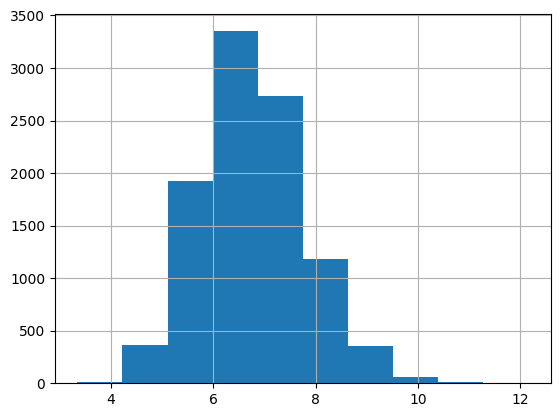

In [13]:

estimate_df['estimate'].hist()

In [14]:
standard_error = sampled_data['aqi'].std() / np.sqrt(len(sampled_data))
standard_error

np.float64(0.7413225908290325)

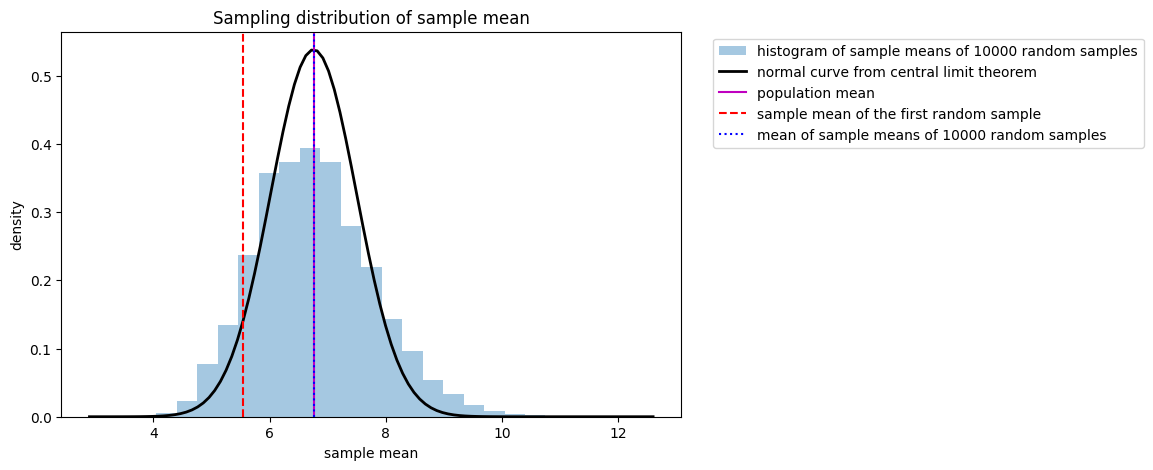

In [15]:
plt.figure(figsize=(8,5))
plt.hist(estimate_df['estimate'], bins=25, density=True, alpha=0.4, label = "histogram of sample means of 10000 random samples")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) # generate a grid of 100 values from xmin to xmax.
p = stats.norm.pdf(x, population_mean, standard_error)
plt.plot(x, p, 'k', linewidth=2, label = 'normal curve from central limit theorem')
plt.axvline(x=population_mean, color='m', linestyle = 'solid', label = 'population mean')
plt.axvline(x=sample_mean, color='r', linestyle = '--', label = 'sample mean of the first random sample')
plt.axvline(x=mean_sample_means, color='b', linestyle = ':', label = 'mean of sample means of 10000 random samples')
plt.title("Sampling distribution of sample mean")
plt.xlabel('sample mean')
plt.ylabel('density')
plt.legend(bbox_to_anchor=(1.04,1));

1. The histogram of the sampling distribution is well-approximated by the normal distribution described by the central limit theorem.
2. The estimate based on one particular sample (red dashed line) is off-center. This is expected due to sampling variability. The red dashed line would be in a different location if epa_data.sample(n=50, replace=True, random_state=42) had a different value for random_state.
3. The population mean (pink solid line) and the mean of the sample means (blue dotted line) overlap, meaning that they are essentially equal to each other. 

## Statistical hypothesis Tests
will go through the following steps for conducting hypothesis testing:

1. Formulate the null hypothesis and the alternative hypothesis.
2. Set the significance level.
3. Determine the appropriate test procedure.
4. Compute the p-value.
5. Draw your conclusion.

**Hypothesis test 1: ROA is considering a metropolitan-focused approach. Within California, they want to know if the mean AQI in Los Angeles County is statistically different from the rest of California.**

In [22]:
## subset the data for comparison
ca_la = epa_data[epa_data['county_name']=='Los Angeles']
ca_other = epa_data[(epa_data['state_name']=='California') & (epa_data['county_name']!='Los Angeles')]
ca_la.head(5)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
33,2018-01-01,California,Los Angeles,Lancaster,Lancaster-Division Street,Carbon monoxide,Parts per million,0.394737,7
42,2018-01-01,California,Los Angeles,Santa Clarita,Santa Clarita,Carbon monoxide,Parts per million,0.394737,7
61,2018-01-01,California,Los Angeles,Pasadena,Pasadena,Carbon monoxide,Parts per million,0.789474,16
76,2018-01-01,California,Los Angeles,Los Angeles,LAX Hastings,Carbon monoxide,Parts per million,0.863158,17
109,2018-01-01,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,Carbon monoxide,Parts per million,0.994737,17


Formulate the null and alternative hypotheses:

H_0: There is no difference in the mean AQI between Los Angeles County and the rest of California. 

H_A: There is a difference in the mean AQI between Los Angeles County and the rest of California.

In [23]:
significance_level = 0.05
significance_level

0.05

In [24]:
# Compute p-value here

stats.ttest_ind(a=ca_la['aqi'], b=ca_other['aqi'], equal_var=False)

TtestResult(statistic=np.float64(2.1107010796372014), pvalue=np.float64(0.049839056842410995), df=np.float64(17.08246830361151))

**With a p-value (0.049) being less than 0.05 (as our significance level is 5%), reject the null hypothesis in favor of the alternative hypothesis.**

**Hypothesis test 2: With limited resources, ROA has to choose between New York and Ohio for their next regional office. Does New York have a lower AQI than Ohio?**

In [25]:
ny = epa_data[epa_data['state_name']=='New York']
ohio = epa_data[epa_data['state_name']=='Ohio']

Formulate your null and alternative hypotheses:

H_0: The mean AQI of New York is greater than or equal to that of Ohio.

H_A: The mean AQI of New York is below that of Ohio.

In [26]:
tstat, pvalue = stats.ttest_ind(a=ny['aqi'], b=ohio['aqi'], alternative='less', equal_var=False)
print(tstat)
print(pvalue)

-2.025951038880333
0.030446502691934683


**with a p-value (0.030) of less than 0.05 (as your significance level is 5%) and a t-statistic < 0 (-2.036), reject the null hypothesis in favor of the alternative hypothesis.**

Therefore, you can conclude at the 5% significance level that New York has a lower mean AQI than Ohio.

**Hypothesis test 3: A new policy will affect those states with a mean AQI of 10 or greater. Will Michigan be affected by this new policy?**

In [28]:
michigan = epa_data[epa_data['state_name']=='Michigan']

H_0: The mean AQI of Michigan is less than or equal to 10.

H_A: The mean AQI of Michigan is greater than 10.

In [29]:
tstat, pvalue = stats.ttest_1samp(michigan['aqi'], 10, alternative='greater')
print(tstat)
print(pvalue)

-1.7395913343286131
0.9399405193140109


**With a p-value (0.940) being greater than 0.05 (as your significance level is 5%) and a t-statistic < 0 (-1.74), fail to reject the null hypothesis.**

Therefore, we cannot conclude at the 5% significance level that Michigan's mean AQI is greater than 10. This implies that Michigan would most likely **not be** affected by the new policy.